In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [22]:
df.shape

(200, 4)

In [6]:
df.corrwith(df['Sales'])

,0
TV,0.901208
Radio,0.349631
Newspaper,0.157960
Sales,1.000000


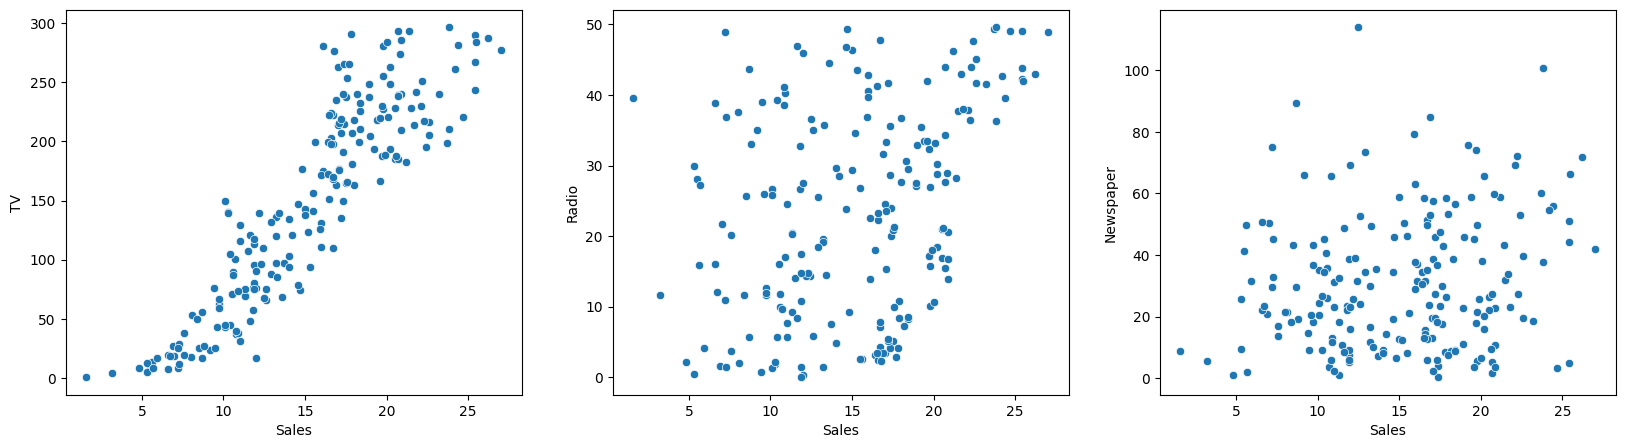

In [16]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.scatterplot(ax=ax[0], data=df, x='Sales', y='TV')
sns.scatterplot(ax=ax[1], data=df, x='Sales', y='Radio')
sns.scatterplot(ax=ax[2], data=df, x='Sales', y='Newspaper')
plt.show()

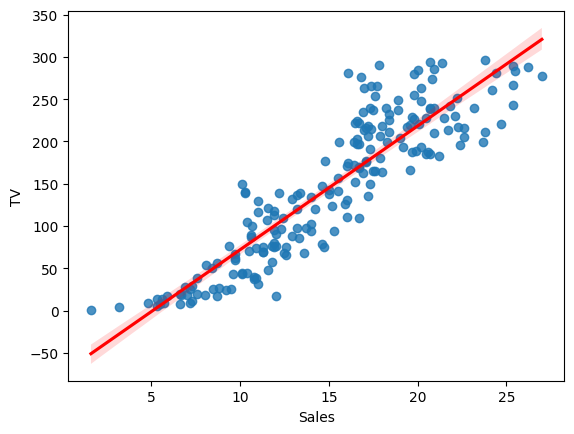

In [21]:
sns.regplot(data=df, x='Sales', y='TV', line_kws={'color':'r'})
plt.show()

In [24]:
train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)
x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

In [25]:
LR_model = LinearRegression()

In [26]:
LR_model.fit(x_train, y_train)

LinearRegression()

In [27]:
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print(f'{theta1 = }')
print(f'{theta0 = }')

theta1 = 0.05513263076693964
theta0 = 7.044916461655207


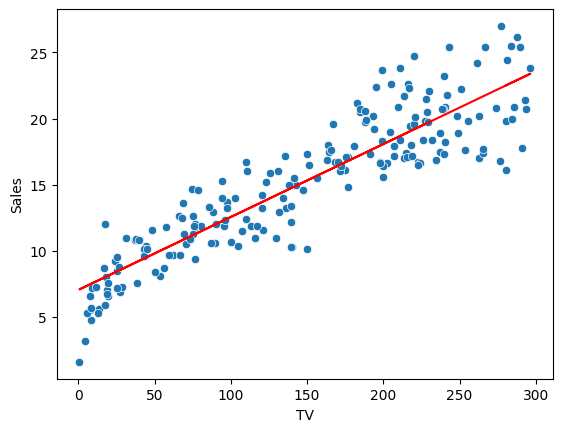

In [30]:
sns.scatterplot(data=df, x='TV', y='Sales')
plt.plot(x_train, theta1*x_train+theta0, '-r')
plt.show()

In [31]:
x_test = np.array(test_set[['TV']])
y_test = np.array(test_set[['Sales']])

y_predicted = LR_model.predict(x_test)

In [32]:
MAE = mean_absolute_error(y_test, y_predicted)
RMSE = mean_squared_error(y_test, y_predicted)
print(f'{MAE = }')
print(f'{RMSE = }')

MAE = 2.037955356968121
RMSE = 6.302018984115436


In [33]:
y_test

array([[16.9],
       [22.4],
       [21.4],
       [ 7.3],
       [24.7],
       [12.6],
       [22.3],
       [ 8.4],
       [16.5],
       [16.1],
       [11. ],
       [ 8.7],
       [16.9],
       [ 5.3],
       [10.3],
       [16.7],
       [ 5.5],
       [16.6],
       [11.3],
       [18.9]])

In [34]:
y_predicted

array([[16.04807507],
       [17.81783251],
       [23.19326401],
       [ 7.68996824],
       [19.19063502],
       [11.18537703],
       [18.99767081],
       [ 9.801548  ],
       [19.30641354],
       [16.69864011],
       [ 8.78159433],
       [10.14337031],
       [19.97351838],
       [ 7.34263267],
       [14.73591845],
       [16.42849022],
       [ 7.44738467],
       [17.9391243 ],
       [11.19640356],
       [20.13340301]])